In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from time import sleep
from tqdm import tqdm
import scipy
from scipy import stats
import scipy.stats
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import scale, StandardScaler
from sklearn.pipeline import Pipeline

from xgboost import plot_importance

In [2]:
# Read in the csv file containing the cleaned data
df = pd.read_csv('Cleaned_Training_Set.csv', header=0)
df = df.drop('Unnamed: 0', axis=1)
df

,country,year,World bank region,"World bank, 4 income groups 2017",Adjusted savings: mineral depletion (current US$),Adjusted savings: energy depletion (current US$),Population (Total),Population growth (annual %),Population density (people per sq. km of land area),Rural population (% of total population),Urban population (% of total),Rural population,Urban population,Urban population growth (annual %),Urban population 5 years in the future
0,Afghanistan,1972,South Asia,Low income,0.000000e+00,2.233065e+07,11644377.0,2.794796,17.853176,88.0702,11.9298,10255226.0,1389151.0,6.634620,1855690
1,Afghanistan,1973,South Asia,Low income,0.000000e+00,2.654146e+07,11966352.0,2.727531,18.346829,87.6208,12.3792,10485013.0,1481339.0,6.425364,1942479
2,Afghanistan,1974,South Asia,Low income,0.000000e+00,6.606462e+07,12273589.0,2.535101,18.817885,87.1714,12.8286,10699059.0,1574530.0,6.101041,2014500
3,Afghanistan,1975,South Asia,Low income,0.000000e+00,6.882184e+07,12551790.0,2.241357,19.244423,86.7220,13.2780,10885163.0,1666627.0,5.684501,2066033
4,Afghanistan,1976,South Asia,Low income,0.000000e+00,6.463635e+07,12806810.0,2.011378,19.635420,86.2426,13.7574,11044926.0,1761884.0,5.558187,2064276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6463,Zimbabwe,1998,Sub-Saharan Africa,Low income,3.574371e+06,2.922644e+06,12229500.0,1.513394,31.613028,67.0524,32.9476,8200173.0,4029327.0,2.750848,4438019
6464,Zimbabwe,1999,Sub-Saharan Africa,Low income,1.121581e+07,0.000000e+00,12384727.0,1.261295,32.014287,66.6472,33.3528,8254074.0,4130653.0,2.483614,4498365
6465,Zimbabwe,2000,Sub-Saharan Africa,Low income,2.259094e+07,1.635434e+06,12503652.0,0.955674,32.321706,66.2420,33.7580,8282669.0,4220983.0,2.163253,4558017
6466,Zimbabwe,2001,Sub-Saharan Africa,Low income,1.491629e+07,2.523939e+07,12586763.0,0.662494,32.536546,65.8216,34.1784,8284809.0,4301954.0,1.900130,4620705


In order to use categorical variables in our model, we will need to assign them a numerical value, which is done in the two cells below.

In [3]:
# Converting income groups to numerical value
df['World bank, 4 income groups 2017'][df['World bank, 4 income groups 2017'] == 'High income'] = 3
df['World bank, 4 income groups 2017'][df['World bank, 4 income groups 2017'] == 'Upper middle income'] = 2
df['World bank, 4 income groups 2017'][df['World bank, 4 income groups 2017'] == 'Lower middle income'] = 1
df['World bank, 4 income groups 2017'][df['World bank, 4 income groups 2017'] == 'Low income'] = 0

<ipython-input-3-d36bff42f33e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['World bank, 4 income groups 2017'][df['World bank, 4 income groups 2017'] == 'High income'] = 3
<ipython-input-3-d36bff42f33e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['World bank, 4 income groups 2017'][df['World bank, 4 income groups 2017'] == 'Upper middle income'] = 2
<ipython-input-3-d36bff42f33e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-

In [4]:
# Converting regions to numerical value
df['World bank region'][df['World bank region'] == 'South Asia'] = 6
df['World bank region'][df['World bank region'] == 'Europe & Central Asia'] = 5
df['World bank region'][df['World bank region'] == 'Middle East & North Africa'] = 4
df['World bank region'][df['World bank region'] == 'East Asia & Pacific'] = 3
df['World bank region'][df['World bank region'] == 'Sub-Saharan Africa'] = 2
df['World bank region'][df['World bank region'] == 'Latin America & Caribbean'] = 1
df['World bank region'][df['World bank region'] == 'North America'] = 0

<ipython-input-4-38dad940a263>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['World bank region'][df['World bank region'] == 'South Asia'] = 6
<ipython-input-4-38dad940a263>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['World bank region'][df['World bank region'] == 'Europe & Central Asia'] = 5
<ipython-input-4-38dad940a263>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['World bank region'][df['World bank region'] ==

In [5]:
df = df.drop('country', axis=1)

In [6]:
df.head()

,year,World bank region,"World bank, 4 income groups 2017",Adjusted savings: mineral depletion (current US$),Adjusted savings: energy depletion (current US$),Population (Total),Population growth (annual %),Population density (people per sq. km of land area),Rural population (% of total population),Urban population (% of total),Rural population,Urban population,Urban population growth (annual %),Urban population 5 years in the future
0,1972,6,0,0.0,2.233065e+07,11644377.0,2.794796,17.853176,88.0702,11.9298,10255226.0,1389151.0,6.634620,1855690
1,1973,6,0,0.0,2.654146e+07,11966352.0,2.727531,18.346829,87.6208,12.3792,10485013.0,1481339.0,6.425364,1942479
2,1974,6,0,0.0,6.606462e+07,12273589.0,2.535101,18.817885,87.1714,12.8286,10699059.0,1574530.0,6.101041,2014500
3,1975,6,0,0.0,6.882184e+07,12551790.0,2.241357,19.244423,86.7220,13.2780,10885163.0,1666627.0,5.684501,2066033
4,1976,6,0,0.0,6.463635e+07,12806810.0,2.011378,19.635420,86.2426,13.7574,11044926.0,1761884.0,5.558187,2064276


In [7]:
# Assign predictors to X and target feature to y
X = df.drop('Urban population 5 years in the future', axis=1).values
y = df['Urban population 5 years in the future'].values

### Train-Test Split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Lasso Regression

/usr/local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 711106807369934.0, tolerance: 685606148985964.1
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 923295209671784.0, tolerance: 871357552392484.8
  model = cd_fast.enet_coordinate_descent(


0.9977219034214142
[ 6.67326513e+03 -1.48818431e+05  1.38508127e+05  6.60493228e-04
 -5.23868774e-05  1.74726331e-01 -1.93739121e+03  2.33940428e+01
  2.10292616e+03 -1.08644470e-09 -1.32790356e-01  9.06848403e-01
  1.52003556e+05]


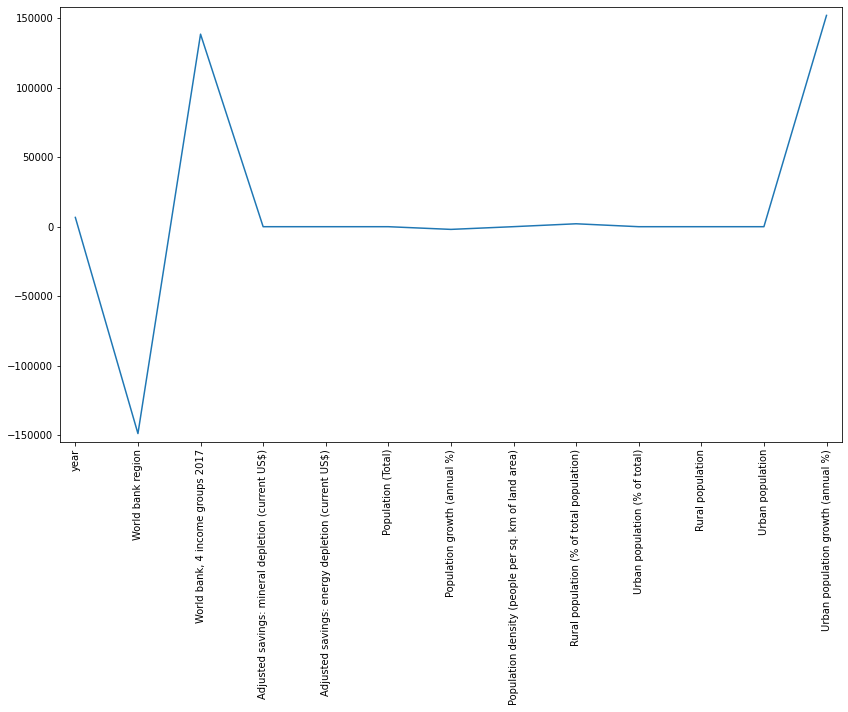

In [9]:
# To determine which features are the best predictors of the target variable
X_cols = df.columns.drop('Urban population 5 years in the future')

lasso = Lasso(alpha=0.5, normalize=True)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)
lasso.score(X_test, y_test)
lasso_coef = lasso.fit(X, y).coef_

print(lasso.score(X_test, y_test))
print(lasso_coef)

_ = plt.figure(figsize=(14,8))
_ = plt.plot(range(len(X_cols)), lasso_coef)
_ = plt.xticks(range(len(X_cols)), X_cols.values, rotation=90)
_ = plt.margins(0.02)
plt.savefig('Lasso Regression.png')
plt.show()


Here we can see that the 3 biggest predictors of urban population five years in the future are the region, income group, and the urban population growth as an annual percentage.

### Ridge Regression

In [10]:
ridge = Ridge(alpha=0.1, normalize=True)

In [11]:
ridge.fit(X_train, y_train)

Ridge(alpha=0.1, normalize=True)

In [12]:
ridge_pred = ridge.predict(X_test)

In [13]:
ridge.score(X_test, y_test)

0.985649736259959

### Linear Regression

In [14]:
reg = LinearRegression()

In [15]:
reg.fit(X_train, y_train)

LinearRegression()

In [16]:
y_pred = reg.predict(X_test)

In [17]:
reg.score(X_test, y_test)

0.9976435077306649

### Cross Validation

In [18]:
cv_results = cross_val_score(reg, X, y, cv=5)
cv_results

array([0.99497174, 0.99437078, 0.99512319, 0.99407353, 0.99818856])

In [19]:
np.mean(cv_results)

0.9953455591640209

Without using cross validation, we get a score of 0.9977 for our linear regression. When using cross-validation, we get a minimum score of 0.9941, a maximum score of 0.9982, and an average score of 0.9953. Because the accuracy of a model can be affected by something as arbitrary as how the data is split into testing and training groups, we use cross validation to see a range of estimated scores.

In [20]:
# The next step would be to check for overfitting.